In [1]:
!pip install git+https://github.com/tna76874/notentransparenz.git > /dev/null 2>&1

m_s1=3.175, m_s=3.175, m_m=3.25, gesamtnote=3.1937499999999996, datum=15.04.2024


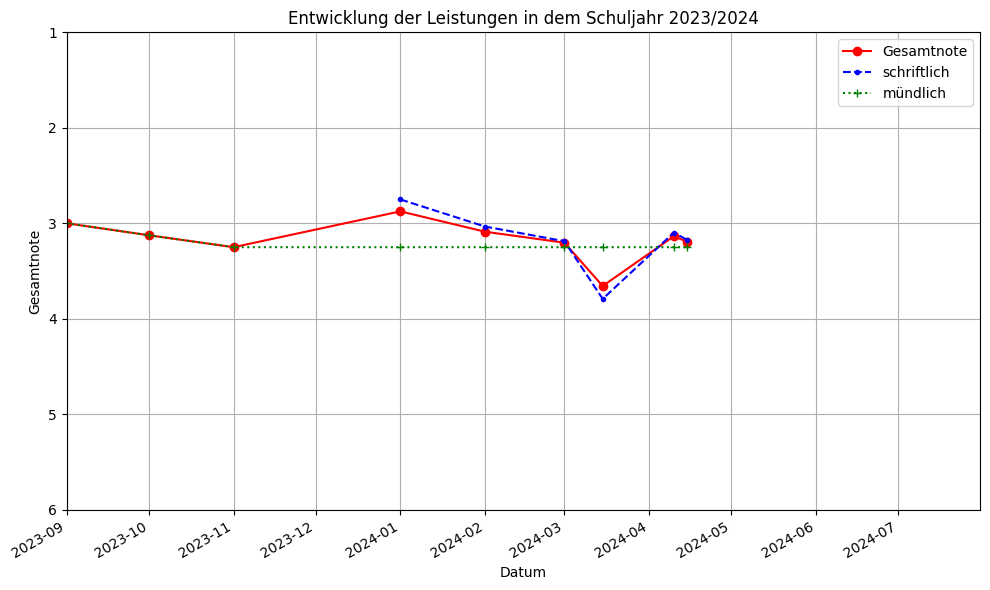

In [2]:
from notenbildung.notenbildung import *

noten = Notenberechnung(w_s0=1, w_sm=3, system = 'N')
noten.note_hinzufuegen(art='KA', date = '2024-04-10', note=2, status='fertig')
noten.note_hinzufuegen(art='KA', date = '2024-04-15', note=2.5, status='fertig')
noten.note_hinzufuegen(art='KA', date = '2024-03-01', note=3, status='fertig')
noten.note_hinzufuegen(art='KA', date = '2024-03-15', note=5, status='fertig')
noten.note_hinzufuegen(art='KT', date = '2024-02-01', note=4, status='fertig')
noten.note_hinzufuegen(art='KT', date = '2024-01-01', note=2.75, status='fertig')
noten.note_hinzufuegen(art='m', date = '2023-09-01', note=3.0)
noten.note_hinzufuegen(art='m', date = '2023-10-01', note=3.25)
noten.note_hinzufuegen(art='m', date = '2023-11-01', note=3.5)

gesamtnote = noten.berechne_gesamtnote()
print(gesamtnote)
noten.plot_time_series()